In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import librosa as lr
import matplotlib.pyplot as plt
import pylab
import librosa.display
import importlib
import utils

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


utils.py correctly charged


# Recovery of data as dataframes

In [2]:
df_train = pd.read_csv("train.csv", "|")
df_test = pd.read_csv("test.csv", "|")

In [3]:
df_train.head()

,soundName,personName,TRN/TST,soundPath,wrdPath,phnPath,txtPath,gender,region,age,recordDate,birthDate,height,race,education,prompt,start,end
0,sa1,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SA1.wav,TIMIT/TRAIN/DR6/MABC0/SA1.wrd,TIMIT/TRAIN/DR6/MABC0/SA1.phn,TIMIT/TRAIN/DR6/MABC0/SA1.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,She had your dark suit in greasy wash water all,0,43418
1,sa2,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SA2.wav,TIMIT/TRAIN/DR6/MABC0/SA2.wrd,TIMIT/TRAIN/DR6/MABC0/SA2.phn,TIMIT/TRAIN/DR6/MABC0/SA2.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,Don't ask me to carry an oily rag like,0,35840
2,sx331,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SX331.wav,TIMIT/TRAIN/DR6/MABC0/SX331.wrd,TIMIT/TRAIN/DR6/MABC0/SX331.phn,TIMIT/TRAIN/DR6/MABC0/SX331.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,The big dog loved to chew on the old rag,0,39322
3,sx61,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SX61.wav,TIMIT/TRAIN/DR6/MABC0/SX61.wrd,TIMIT/TRAIN/DR6/MABC0/SX61.phn,TIMIT/TRAIN/DR6/MABC0/SX61.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,Chocolate and roses never fail as a romantic,0,39936
4,sx241,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SX241.wav,TIMIT/TRAIN/DR6/MABC0/SX241.wrd,TIMIT/TRAIN/DR6/MABC0/SX241.phn,TIMIT/TRAIN/DR6/MABC0/SX241.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,The hallway opens into a huge,0,31949


# Data visualization

In [4]:
print("Shape of training data : ", df_train.shape)
print("Shape of testing data  : ", df_test.shape)

Shape of training data :  (4620, 18)
Shape of testing data  :  (1680, 18)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 18 columns):
soundName     4620 non-null object
personName    4620 non-null object
TRN/TST       4620 non-null object
soundPath     4620 non-null object
wrdPath       4620 non-null object
phnPath       4620 non-null object
txtPath       4620 non-null object
gender        4620 non-null object
region        4620 non-null object
age           4620 non-null int64
recordDate    4620 non-null object
birthDate     4620 non-null object
height        4620 non-null float64
race          4620 non-null object
education     4620 non-null object
prompt        4620 non-null object
start         4620 non-null int64
end           4620 non-null int64
dtypes: float64(1), int64(3), object(14)
memory usage: 649.8+ KB


In [6]:
df_train = df_train.drop(['personName','soundName','txtPath','phnPath','wrdPath','TRN/TST','region','age','recordDate','birthDate','height','race','education','prompt','start','end'], axis = 1)
df_test = df_test.drop(['personName','soundName','txtPath','phnPath','wrdPath','TRN/TST','region','age','recordDate','birthDate','height','race','education','prompt','start','end'], axis = 1)

In [7]:
df_train['gender'] = df_train.gender.map({'M':0, 'F':1})
df_test['gender'] = df_test.gender.map({'M':0, 'F':1})

In [8]:
df_train.head()

,soundPath,gender
0,TIMIT/TRAIN/DR6/MABC0/SA1.wav,0
1,TIMIT/TRAIN/DR6/MABC0/SA2.wav,0
2,TIMIT/TRAIN/DR6/MABC0/SX331.wav,0
3,TIMIT/TRAIN/DR6/MABC0/SX61.wav,0
4,TIMIT/TRAIN/DR6/MABC0/SX241.wav,0


In [9]:
df_test.head()

,soundPath,gender
0,TIMIT/TEST/DR2/MABW0/SA1.wav,0
1,TIMIT/TEST/DR2/MABW0/SA2.wav,0
2,TIMIT/TEST/DR2/MABW0/SX134.wav,0
3,TIMIT/TEST/DR2/MABW0/SX314.wav,0
4,TIMIT/TEST/DR2/MABW0/SX44.wav,0


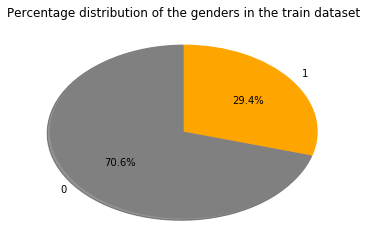

0    3260
1    1360
Name: gender, dtype: int64

In [10]:
type = df_train.gender.value_counts()
labels = (np.array(type.index))
sizes = (np.array((type / type.sum())*100))
colors = ['grey', 'orange']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percentage distribution of the genders in the train dataset")
plt.show()

df_train.gender.value_counts()

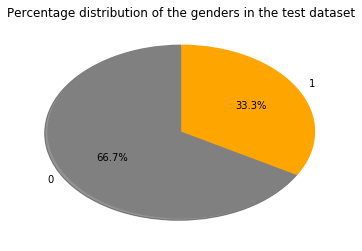

0    1120
1     560
Name: gender, dtype: int64

In [11]:
type = df_test.gender.value_counts()
labels = (np.array(type.index))
sizes = (np.array((type / type.sum())*100))
colors = ['grey', 'orange']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percentage distribution of the genders in the test dataset")
plt.show()

df_test.gender.value_counts()

# Undersampling

In [12]:
df_train = utils.undersample(df_train, 'gender', 1)
print("Train")
print(df_train.gender.value_counts())
print("\n")

print("Test")
df_test = utils.undersample(df_test, 'gender', 1)
print(df_test.gender.value_counts())

Train
1    1360
0    1360
Name: gender, dtype: int64


Test
1    560
0    560
Name: gender, dtype: int64


# Extracting audio files

In [13]:
train_audio_list = df_train.soundPath.tolist()
test_audio_list = df_test.soundPath.tolist()

In [14]:
train_temp_features = []
test_temp_features = []

for elt in train_audio_list:
    train_temp_features.append(utils.extract_features(elt))

for elt in test_audio_list:
    test_temp_features.append(utils.extract_features(elt))

# Preparation of train and test data

In [15]:
X_train = np.array(train_temp_features)
y_train = np.array(df_train.gender.tolist())
X_test = np.array(test_temp_features)
y_test = np.array(df_test.gender.tolist())

# Machine Learning

### Gaussian NB Classifier

In [16]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Test accuracy :  0.9616071428571429 

30 males classified as females out of 560, 5.357 %
13 females classified as males out of 560, 2.321 %

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       560
           1       0.98      0.95      0.96       560

   micro avg       0.96      0.96      0.96      1120
   macro avg       0.96      0.96      0.96      1120
weighted avg       0.96      0.96      0.96      1120



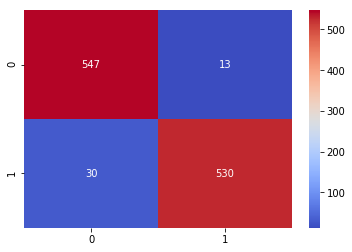

In [17]:
utils.test_classifier(clf, X_test, y_test)

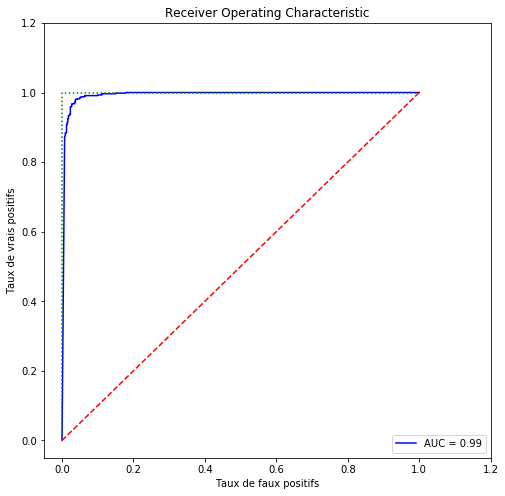

In [18]:
utils.plot_roc_curve(clf, X_test, y_test)

d:\program files\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


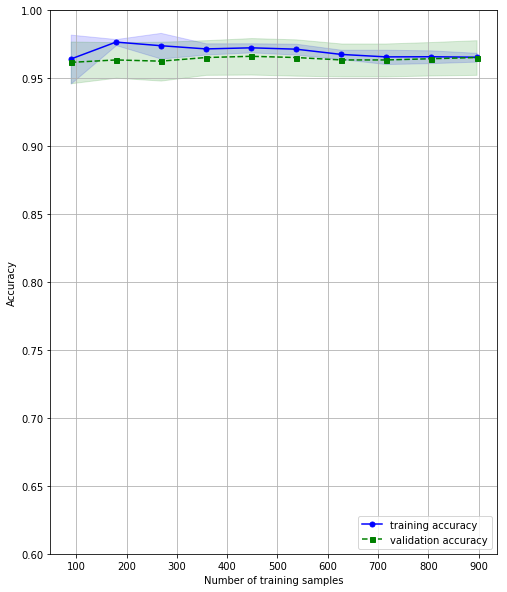

In [19]:
utils.plot_learning_curve(clf, X_test, y_test)

# XGBoost Classifier

Test accuracy :  0.9696428571428571 

26 males classified as females out of 560, 4.643 %
8 females classified as males out of 560, 1.429 %

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       560
           1       0.99      0.95      0.97       560

   micro avg       0.97      0.97      0.97      1120
   macro avg       0.97      0.97      0.97      1120
weighted avg       0.97      0.97      0.97      1120



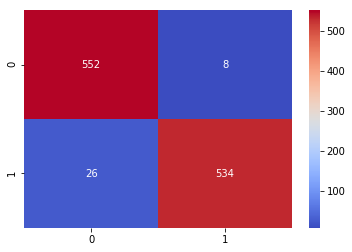

In [20]:
from xgboost import XGBClassifier 

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
utils.test_classifier(xgb, X_test, y_test)

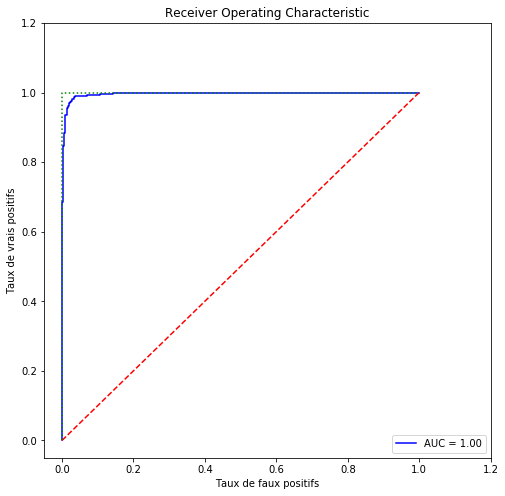

In [21]:
utils.plot_roc_curve(xgb, X_test, y_test)

d:\program files\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


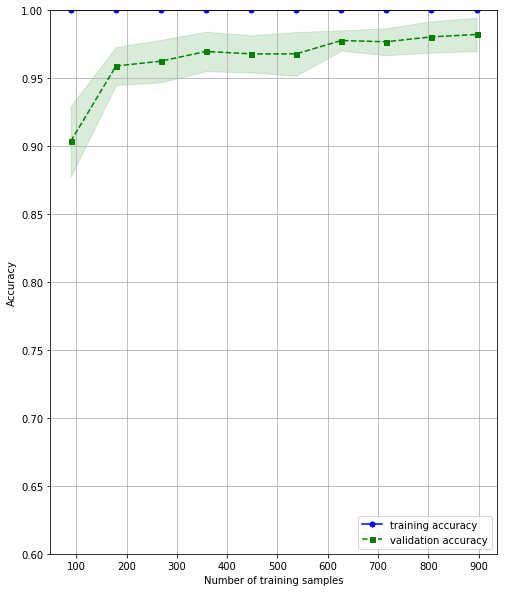

In [22]:
utils.plot_learning_curve(xgb, X_test, y_test)

# GradientBoosting Classifier

Test accuracy :  0.9705357142857143 

24 males classified as females out of 560, 4.286 %
9 females classified as males out of 560, 1.607 %

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       560
           1       0.98      0.96      0.97       560

   micro avg       0.97      0.97      0.97      1120
   macro avg       0.97      0.97      0.97      1120
weighted avg       0.97      0.97      0.97      1120



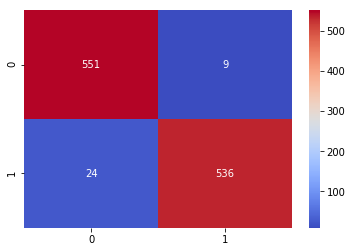

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
utils.test_classifier(gb, X_test, y_test)

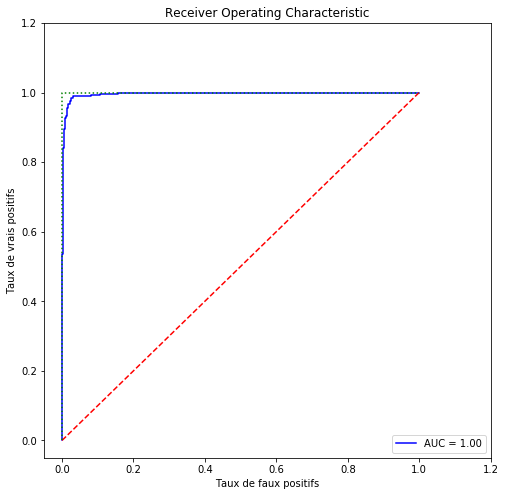

In [24]:
utils.plot_roc_curve(gb, X_test, y_test)

d:\program files\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


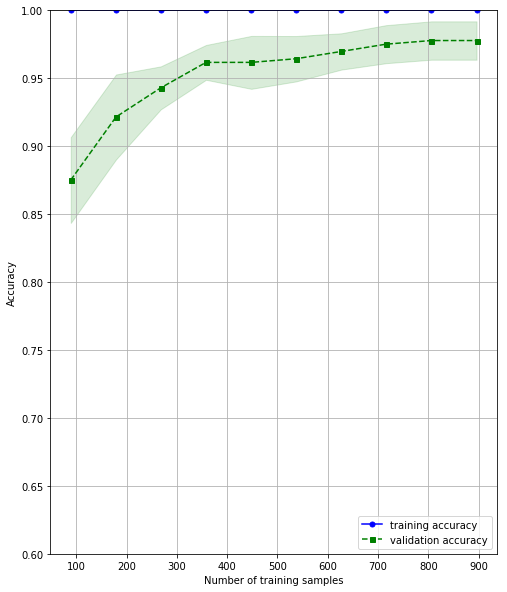

In [25]:
utils.plot_learning_curve(gb, X_test, y_test)

# Deep Learning

In [75]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [76]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               10496     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 65        
Total params: 51,713
Trainable params: 51,713
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
classifier = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Train on 2720 samples, validate on 1120 samples
Epoch 1/10
2720/2720 [==============================] - 0s 77us/step - loss: 0.0264 - acc: 0.9904 - val_loss: 0.0991 - val_acc: 0.9723
Epoch 2/10
2720/2720 [==============================] - 0s 74us/step - loss: 0.0199 - acc: 0.9938 - val_loss: 0.1762 - val_acc: 0.9688
Epoch 3/10
2720/2720 [==============================] - 0s 99us/step - loss: 0.0233 - acc: 0.9908 - val_loss: 0.1018 - val_acc: 0.9812
Epoch 4/10
2720/2720 [==============================] - 0s 82us/step - loss: 0.0284 - acc: 0.9908 - val_loss: 0.1575 - val_acc: 0.9688
Epoch 5/10
2720/2720 [==============================] - 0s 98us/step - loss: 0.0263 - acc: 0.9897 - val_loss: 0.1057 - val_acc: 0.9812
Epoch 6/10
2720/2720 [==============================] - 0s 102us/step - loss: 0.0179 - acc: 0.9941 - val_loss: 0.0981 - val_acc: 0.9786
Epoch 7/10
2720/2720 [==============================] - 0s 77us/step - loss: 0.0130 - acc: 0.9952 - val_loss: 0.2748 - val_acc: 0.9670
Epoch 

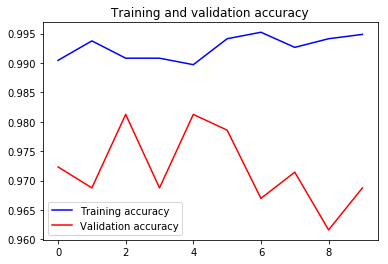

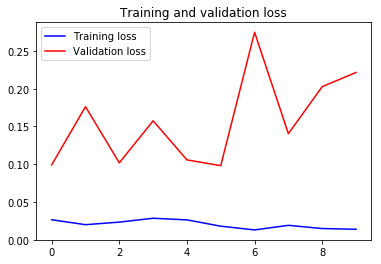

In [89]:
utils.model_curves(classifier)

In [90]:
classifier = model.save('gender_classifier.h5')

In [91]:
scores = model.evaluate(X_test, y_test)
print("Score : %.2f%%" % (scores[1]*100))

1120/1120 [==============================] - 0s 29us/step
Score : 96.88%


# Prediction

In [92]:
y_pred = model.predict(X_test)

In [95]:
from scipy.io import wavfile as wav
import IPython.display as ipd
import random

labels = ["male","female"]
n_test = X_test.shape[0]

ir = random.randint(0,n_test)
print("filename :", test_audio_list[ir])
print("model prediction :", labels[y_pred[ir].astype(int)[0]])
ipd.Audio(test_audio_list[ir])

filename : TIMIT/TEST/DR5/FJSA0/SX119.wav
model prediction : female
